In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DEEP LEARNING DATASETS/train_tweet.csv')


In [3]:
data.shape

(31962, 3)

In [4]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
data.isnull().sum()

,0
id,0
label,0
tweet,0


In [6]:
data.dtypes

,0
id,int64
label,int64
tweet,object


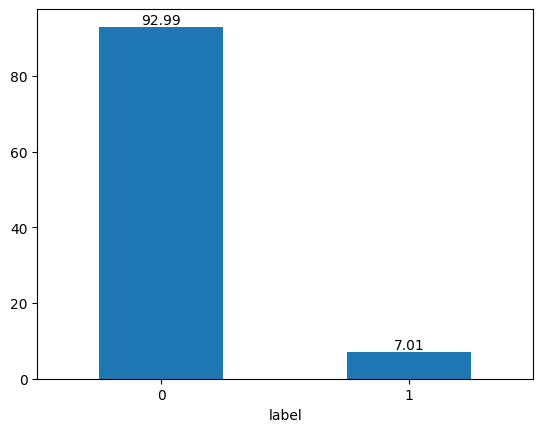

In [7]:
fg = round(data['label'].value_counts(normalize = True)*100,2).plot.bar()
fg.bar_label(fg.containers[0])
plt.xticks(rotation = 0)
plt.show()

In [8]:
del data['id']

In [9]:
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [10]:
# dataframe to understand the most frequently repeated word
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['tweet'])

sum_words = words.sum(axis = 0)

word_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)

frequency = pd.DataFrame(word_freq, columns = ['words', 'counts'])
frequency.head()

,words,counts
0,user,17577
1,love,2749
2,day,2311
3,amp,1776
4,happy,1686


In [11]:
# print(dir(cv))

In [12]:
# ?cv.vocabulary_

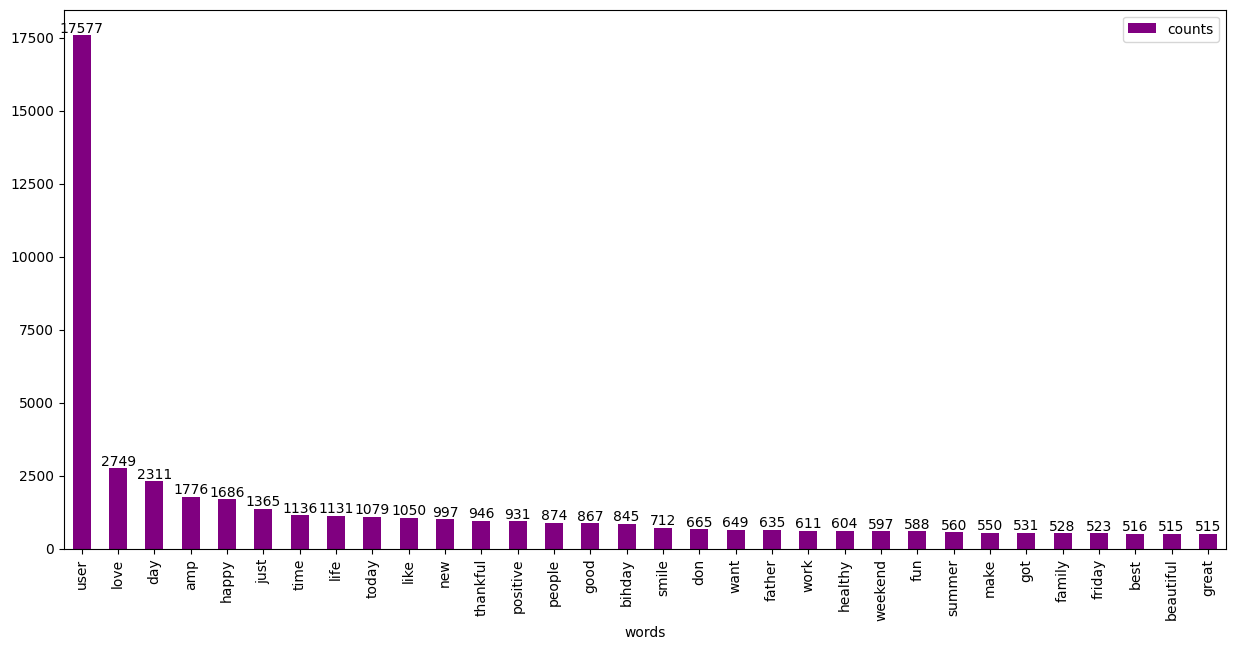

In [13]:
# plot the top 30 words by frequency
freq_plt = frequency.loc[:31].plot(x= 'words',y= 'counts',kind = 'bar',figsize = (15,7), color = 'purple')
freq_plt.bar_label(freq_plt.containers[0])
plt.show()

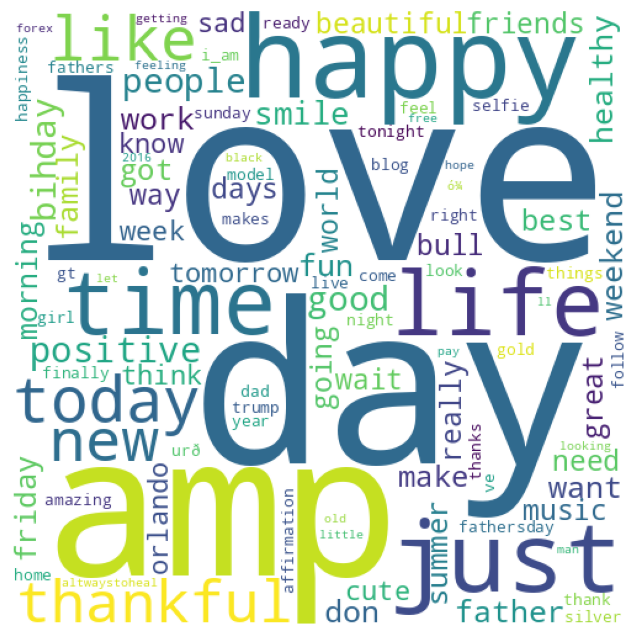

In [14]:
# User here is a PII data
# word cloud excluding the PII data
from wordcloud import WordCloud
wc_plt = WordCloud(background_color = 'white', height = 500,width = 500).generate_from_frequencies(dict(word_freq[1:100]))
plt.figure(figsize = (10,8))
plt.imshow(wc_plt)
plt.axis('off')
plt.show()

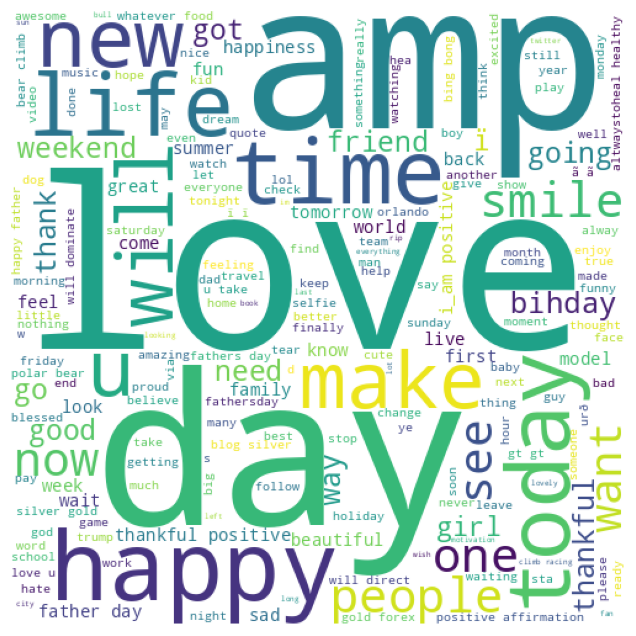

In [15]:
# filter the data for tweet label 0
positive_tweet = ' '.join([word for word in data['tweet'][data['label']==0]])
positive_tweet

items_to_remove = ['user','ð', 'â', '\\', 'x91']
pattern = r'\b('+'|'.join(re.escape(word) for word in items_to_remove)+r')\b'
res = re.sub(pattern,'',positive_tweet)
res = re.sub(r'\s+',' ',res).strip()

wc_plt = WordCloud(background_color = 'white', width = 500, height = 500).generate(res)

plt.figure(figsize = (10,8))
plt.imshow(wc_plt)
plt.axis('off')
plt.show()

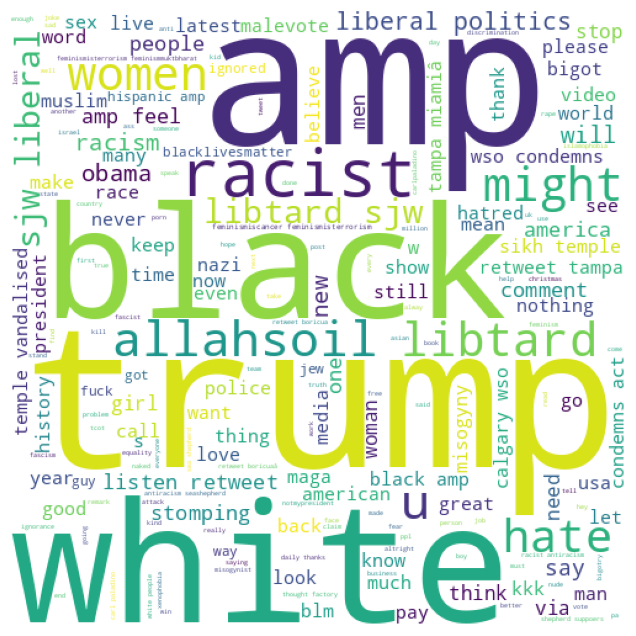

In [16]:
# filter the data for tweet label 1
negative_tweet = ' '.join([word for word in data['tweet'][data['label']==1]])
negative_tweet

items_to_remove = ['user','ð', 'â', '\\', 'x91']
pattern = r'\b('+'|'.join(re.escape(word) for word in items_to_remove)+r')\b'
res = re.sub(pattern,'',negative_tweet)
res = re.sub(r'\s+',' ',res).strip()

wc_plt = WordCloud(background_color = 'white', width = 500, height = 500).generate(res)

plt.figure(figsize = (10,8))
plt.imshow(wc_plt)
plt.axis('off')
plt.show()

In [17]:
# ?re.escape

In [18]:
# func to extract hashtags
def hashtag_extract(x):
  hash = []

  for i in x:
    ht = re.findall(f'#(\w+)',i)
    hash.append(ht)

  return hash

In [19]:
# extracting hashtag from positive tweet
ht_positive = hashtag_extract(data['tweet'][data['label']==0])

# extracting hashtag from positive tweet
ht_negative = hashtag_extract(data['tweet'][data['label']==1])

In [20]:
ht_positive

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'

In [21]:
# unnesting the list
ht_positive = [hashtag for sublist in ht_positive for hashtag in sublist]
ht_negative = [hashtag for sublist in ht_negative for hashtag in sublist]

In [22]:
ht_positive

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

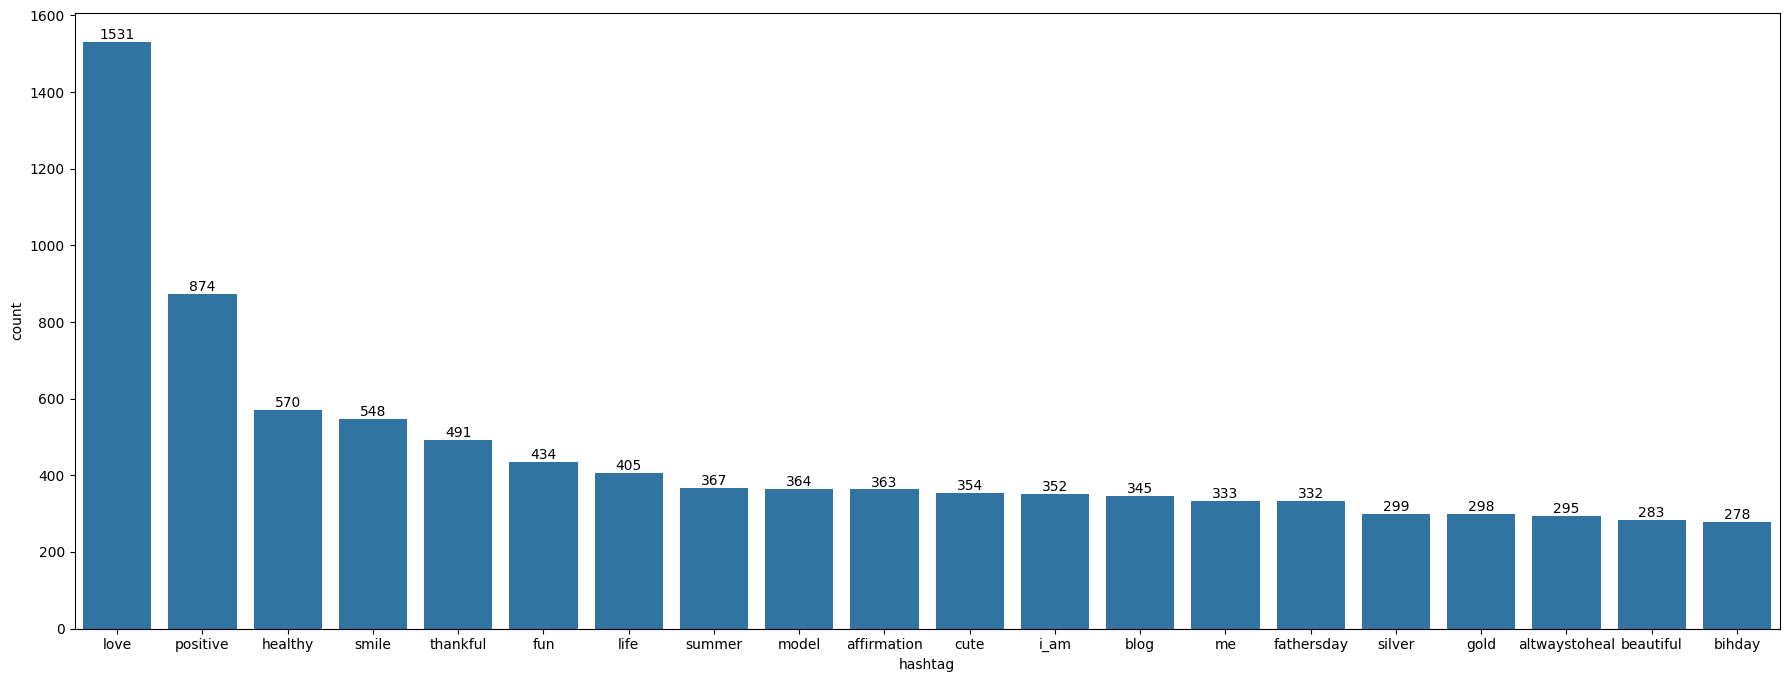

In [23]:
# top 20 positive hashtag
import nltk
a = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'hashtag':list(a.keys()),
                  'count':list(a.values())})

# plot
d = d.nlargest(columns = 'count',n=20)
plt.figure(figsize = (22,8))
ax = sns.barplot(d, x = 'hashtag', y= 'count')
ax.bar_label(ax.containers[0])
plt.show()

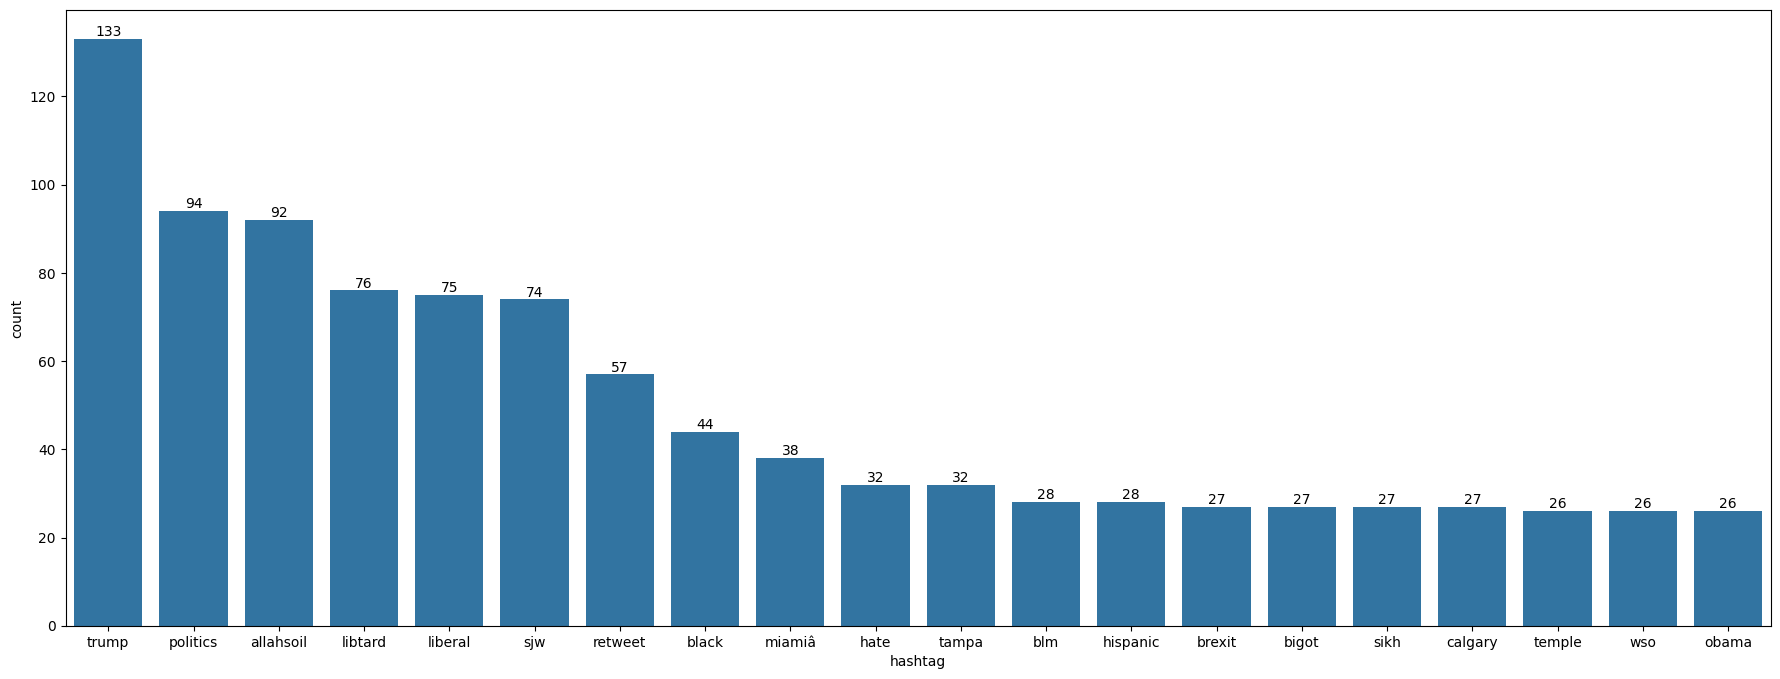

In [24]:
# top 20 negative hashtag

a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'hashtag':list(a.keys()),
                  'count':list(a.values())})

# plot
d = d.nlargest(columns = 'count',n=20)
plt.figure(figsize = (22,8))
ax = sns.barplot(d, x = 'hashtag', y= 'count')
ax.bar_label(ax.containers[0])
plt.show()

In [25]:
# importing the required libraries
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# regex to retain only the text from the data
train_corpus = []
for  i in range(0, len(data)):
  review = re.sub('[^a-zA-Z\s]','',data['tweet'][i])
  reivew = review.lower()
  review = review.split()

  ps = PorterStemmer().stem

  # stemming
  review = [ps(word) for word in review if word not in stopwords.words('english')]

  # joining back the words
  review = ' '.join(review)
  train_corpus.append(review)

In [27]:
data['label']

,label
0,0
1,0
2,0
3,0
4,0
...,...
31957,0
31958,0
31959,0
31960,1


In [28]:
# embedding
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x = vec.fit_transform(train_corpus).toarray()
y= data['label']

In [29]:
# train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, stratify = y)

Test Accuracy:  0.9394650398873768
F1-Score:  0.23968565815324164


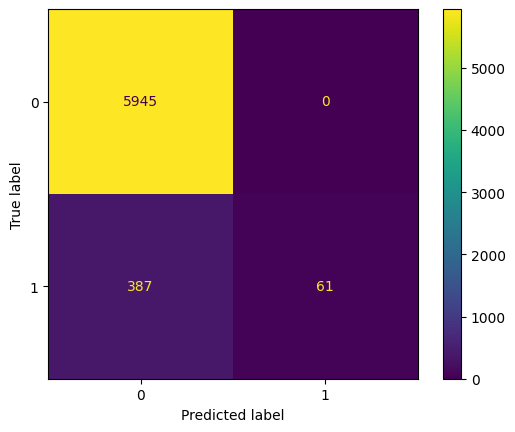

In [30]:
# Ml based NLP model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score

model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('F1-Score: ', f1_score(y_test,y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42)
model_dt.fit(x_train,y_train)

y_pred = model_dt.predict(x_test)

print('Accuracy Score: ',round(accuracy_score(y_test,y_pred)*100,2))
print('f1-score: ',f1_score(y_test,y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 42, n_jobs = -1)
model_lr.fit(x_train,y_train)

y_pred = model_lr.predict(x_test)

print('Accuracy Score: ',round(accuracy_score(y_test,y_pred)*100,2))
print('f1-score: ',f1_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
def flatten_dic(dic, key = '',sep = '.'):
2	    new_dic ={}
3	    for k, v in dic.items():
4	        new_key = f"{key}{sep}{k}" if key else k
5	        if isinstance(v, dict):
6	            new_dic.update(flatten_dic(v,new_key,sep = sep))
7	        else:
8	            new_dic[new_key] = v
9
10	    return new_dic
11
12
13	flatten_dic({'a':{'b':3},'d':6})